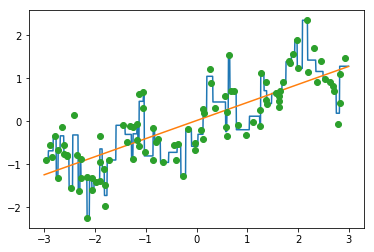

In [1]:
from sklearn.preprocessing import OneHotEncoder

import os, mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X,y=mglearn.datasets.make_wave(n_samples=100)
line=np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

reg=DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line, reg.predict(line), label='Decision Tree')

reg=LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line), label='Linear regressor')

plt.plot(X[:,0],y,'o')

plt.show()

In [2]:
bins=np.linspace(-3,3,11)
print(bins)

[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [3]:
which_bin=np.digitize(X,bins=bins)
print('data points: \n {}'.format(X[:5]))
print('bin membership: \n {}'.format(which_bin[:5]))

data points: 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
bin membership: 
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [4]:
encoder=OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned=encoder.transform(which_bin)
print(X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [5]:
print(X_binned.shape)

(100, 10)


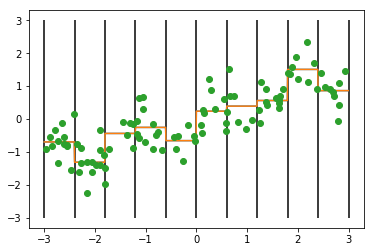

In [6]:
line_binned=encoder.transform(np.digitize(line, bins=bins))

reg=DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line, reg.predict(line_binned), label='Decision Tree')

reg=LinearRegression().fit(X_binned,y)
plt.plot(line,reg.predict(line_binned), label='Linear regressor')

plt.plot(X[:,0],y,'o')

plt.vlines(bins,-3,3)

plt.show()

In [9]:
X_combined=np.hstack([X,X_binned])
print(X_combined)
print(X_combined.shape)

[[-0.75275929  0.          0.         ...,  0.          0.          0.        ]
 [ 2.70428584  0.          0.         ...,  0.          0.          1.        ]
 [ 1.39196365  0.          0.         ...,  1.          0.          0.        ]
 ..., 
 [-0.43475389  0.          0.         ...,  0.          0.          0.        ]
 [-2.84748524  1.          0.         ...,  0.          0.          0.        ]
 [-2.35265144  0.          1.         ...,  0.          0.          0.        ]]
(100, 11)


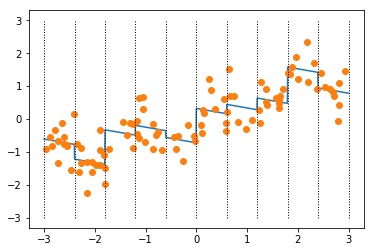

In [15]:
reg=LinearRegression().fit(X_combined,y)
line_combined=np.hstack([line,line_binned])
plt.plot(line,reg.predict(line_combined))
plt.plot(X[:,0],y,'o')

for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k',linewidth=1)
    
plt.show()

In [16]:
X_product=np.hstack([X_binned,X*X_binned])
print(X_product)

[[ 0.          0.          0.         ..., -0.         -0.         -0.        ]
 [ 0.          0.          0.         ...,  0.          0.          2.70428584]
 [ 0.          0.          0.         ...,  1.39196365  0.          0.        ]
 ..., 
 [ 0.          0.          0.         ..., -0.         -0.         -0.        ]
 [ 1.          0.          0.         ..., -0.         -0.         -0.        ]
 [ 0.          1.          0.         ..., -0.         -0.         -0.        ]]


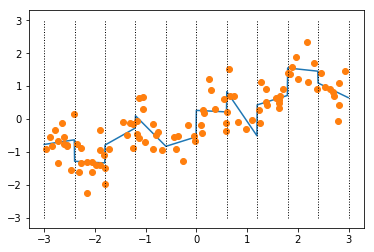

In [21]:
reg=LinearRegression().fit(X_product,y)

line_product=np.hstack([line_binned, line*line_binned])
plt.plot(line,reg.predict(line_product))
plt.plot(X[:,0],y,'o')

for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k',linewidth=1)
    
plt.show()